In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('heart_v2.csv')
df.head()


,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


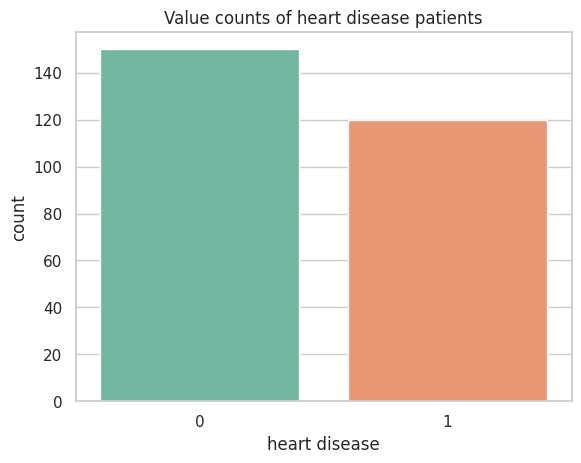

In [4]:
sns.countplot(data =df,x='heart disease',palette='Set2')
plt.title('Value counts of heart disease patients')
plt.show()



In [5]:
X = df.drop('heart disease', axis=1)
y = df['heart disease']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [10]:
classifier_rf.oob_score_

0.656084656084656

In [11]:
#n_estimators: Number of trees the algorithm builds before averaging the predictions.
#n_jobs: number of jobs to run in parallel 
#it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor, but if the value is -1, there is no limit.
#random_state: controls randomness of the sample.
#oob_score:(out of the bag)It is a random forest cross-validation method. 
#In this, one-third of the sample is not used to train the data; instead used to evaluate its performance.

In [13]:
################################
from sklearn.metrics import accuracy_score

In [14]:
prediction_test = classifier_rf.predict(X_test)
accuracy_score(y_test, prediction_test)

0.654320987654321

In [15]:
prediction_train = classifier_rf.predict(X_train)
accuracy_score(y_train,prediction_train)
#################################

0.8835978835978836

Grid Search Cross Validation

Hyperparameter tuning for random forest using GridSearchCV and fit the data

In [16]:
rf = RandomForestClassifier(random_state=42,n_jobs=-1)
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators':[10,25,30,50,100,200]
}

In [17]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,param_grid=params,cv = 4,n_jobs=-1, verbose=1, scoring="accuracy")
#it searches for the optimal hyperparameters of a model by evaluating the model's performance on different combinations of hyperparameter values.
#The verbose option specifies that you want to display detailed processing information on your screen. 

In [19]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [34]:
grid_search.best_score_

0.6985815602836879

In [21]:
rf_best = grid_search.best_estimator_
rf_best
#The best set of parameters identified was max_depth=5, min_samples_leaf=10,n_estimators=10
#(mini_sample_leaf: Determines the minimum number of leaves required to split an internal node.)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

Visualization

In [22]:
from sklearn.tree import plot_tree

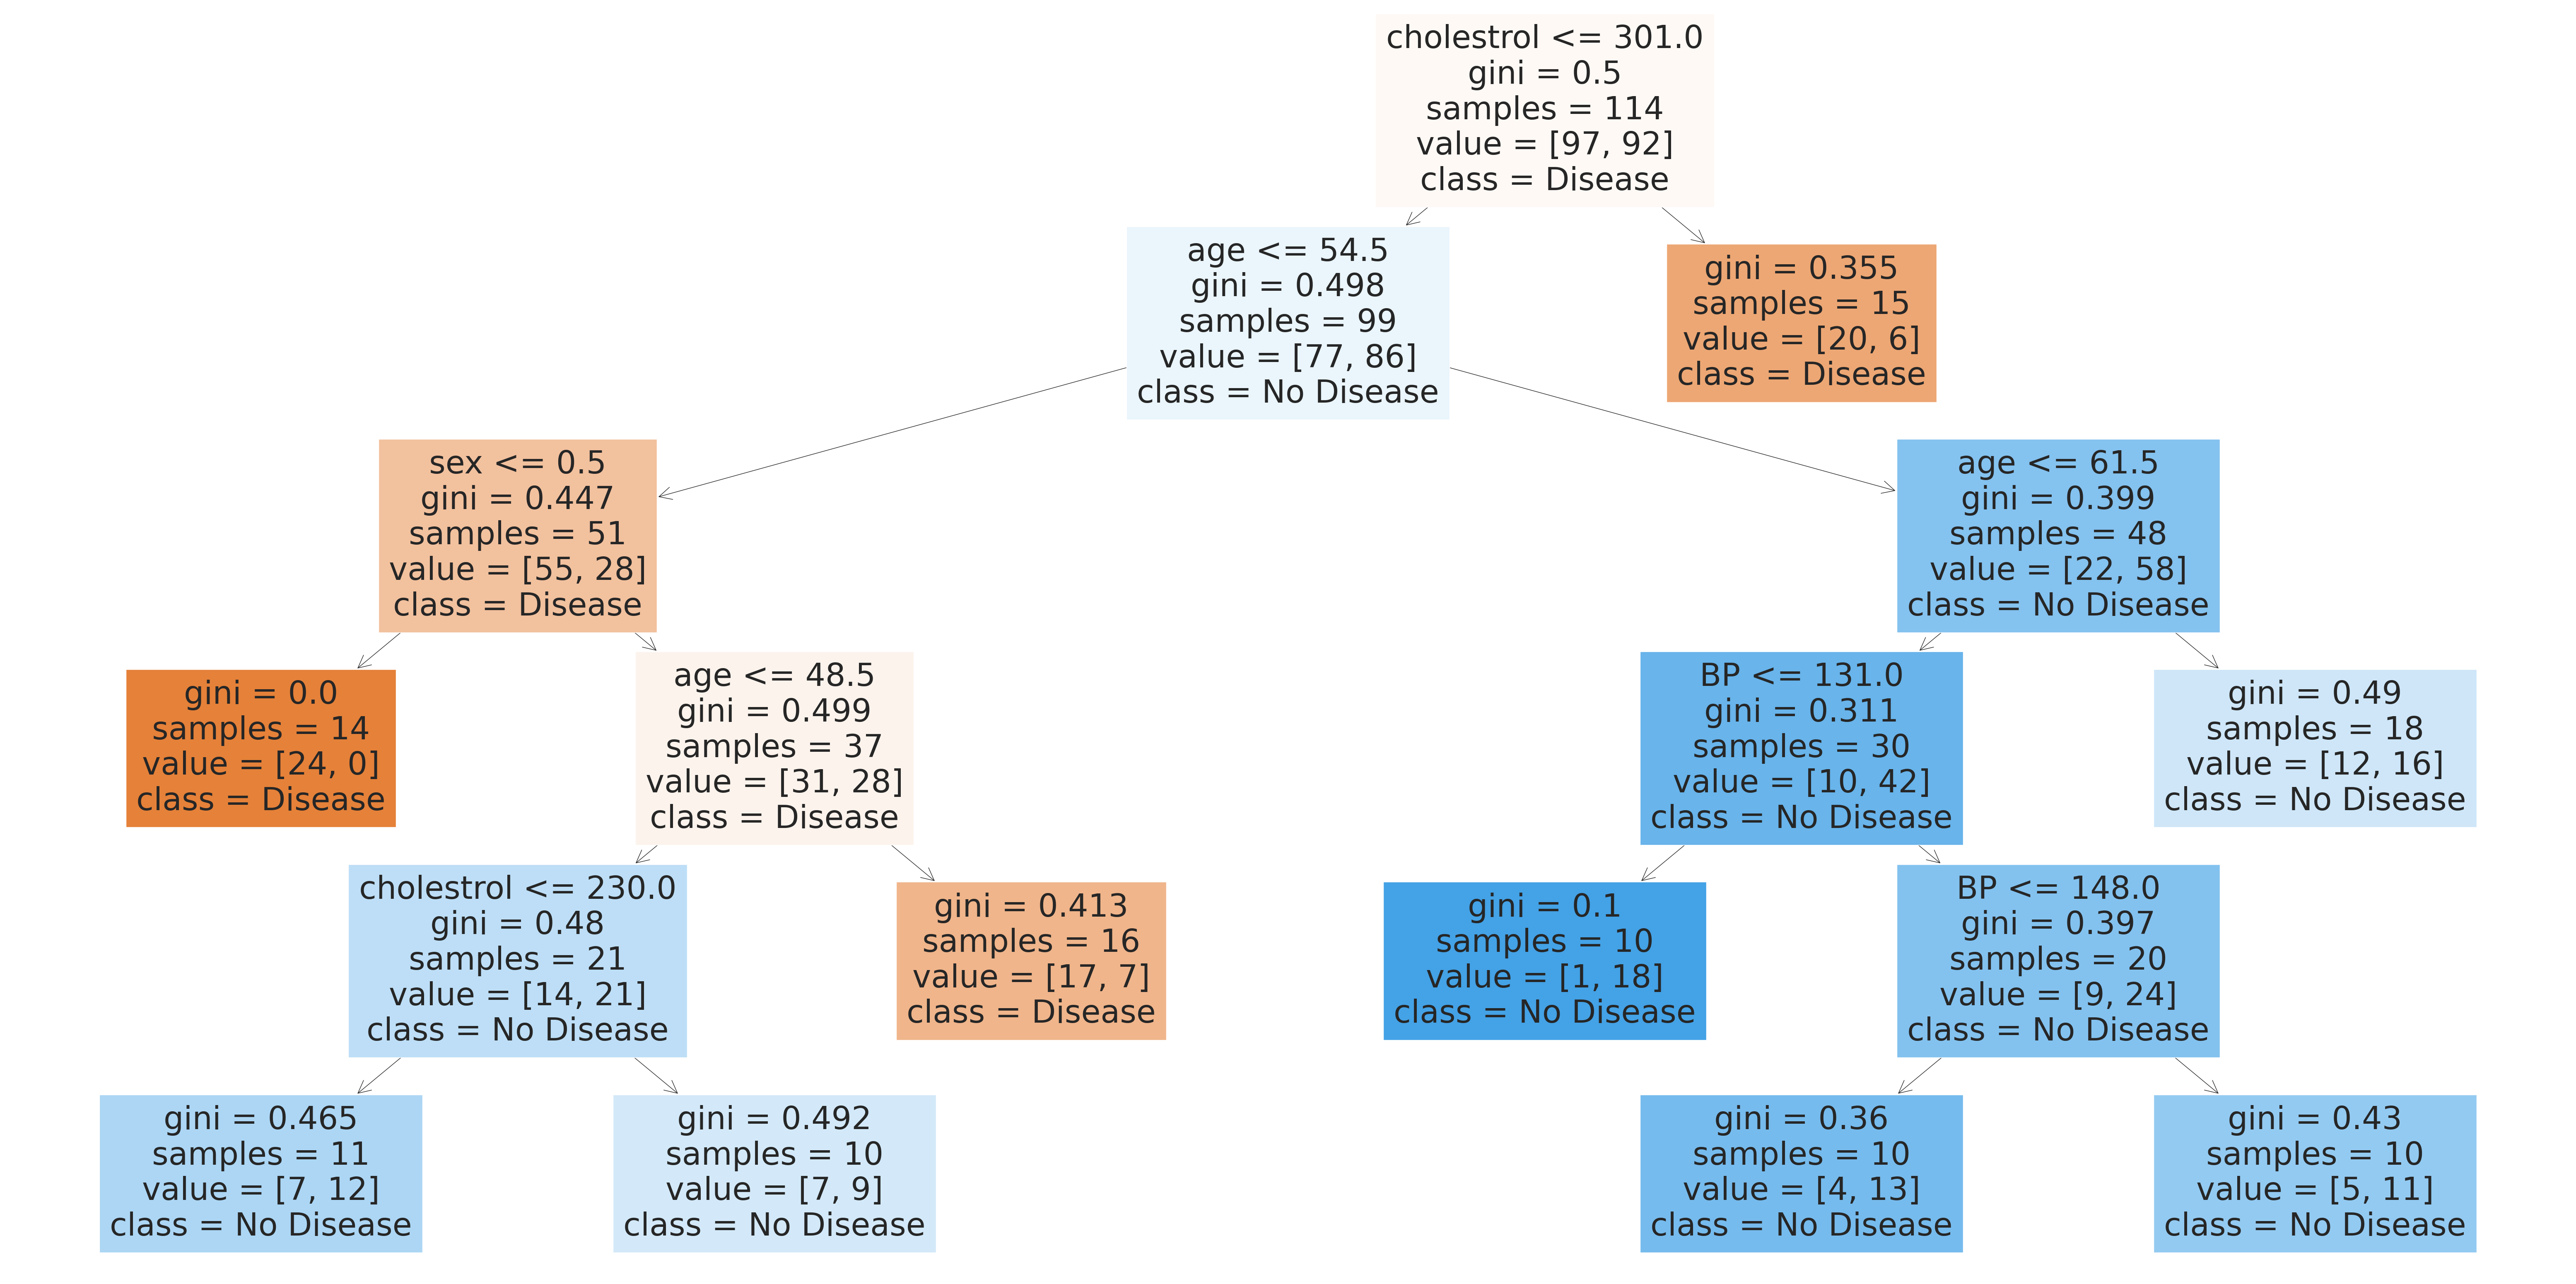

In [23]:

plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5],feature_names=['age', 'sex', 'BP', 'cholestrol'],class_names=['Disease', "No Disease"],filled=True)
plt.show()

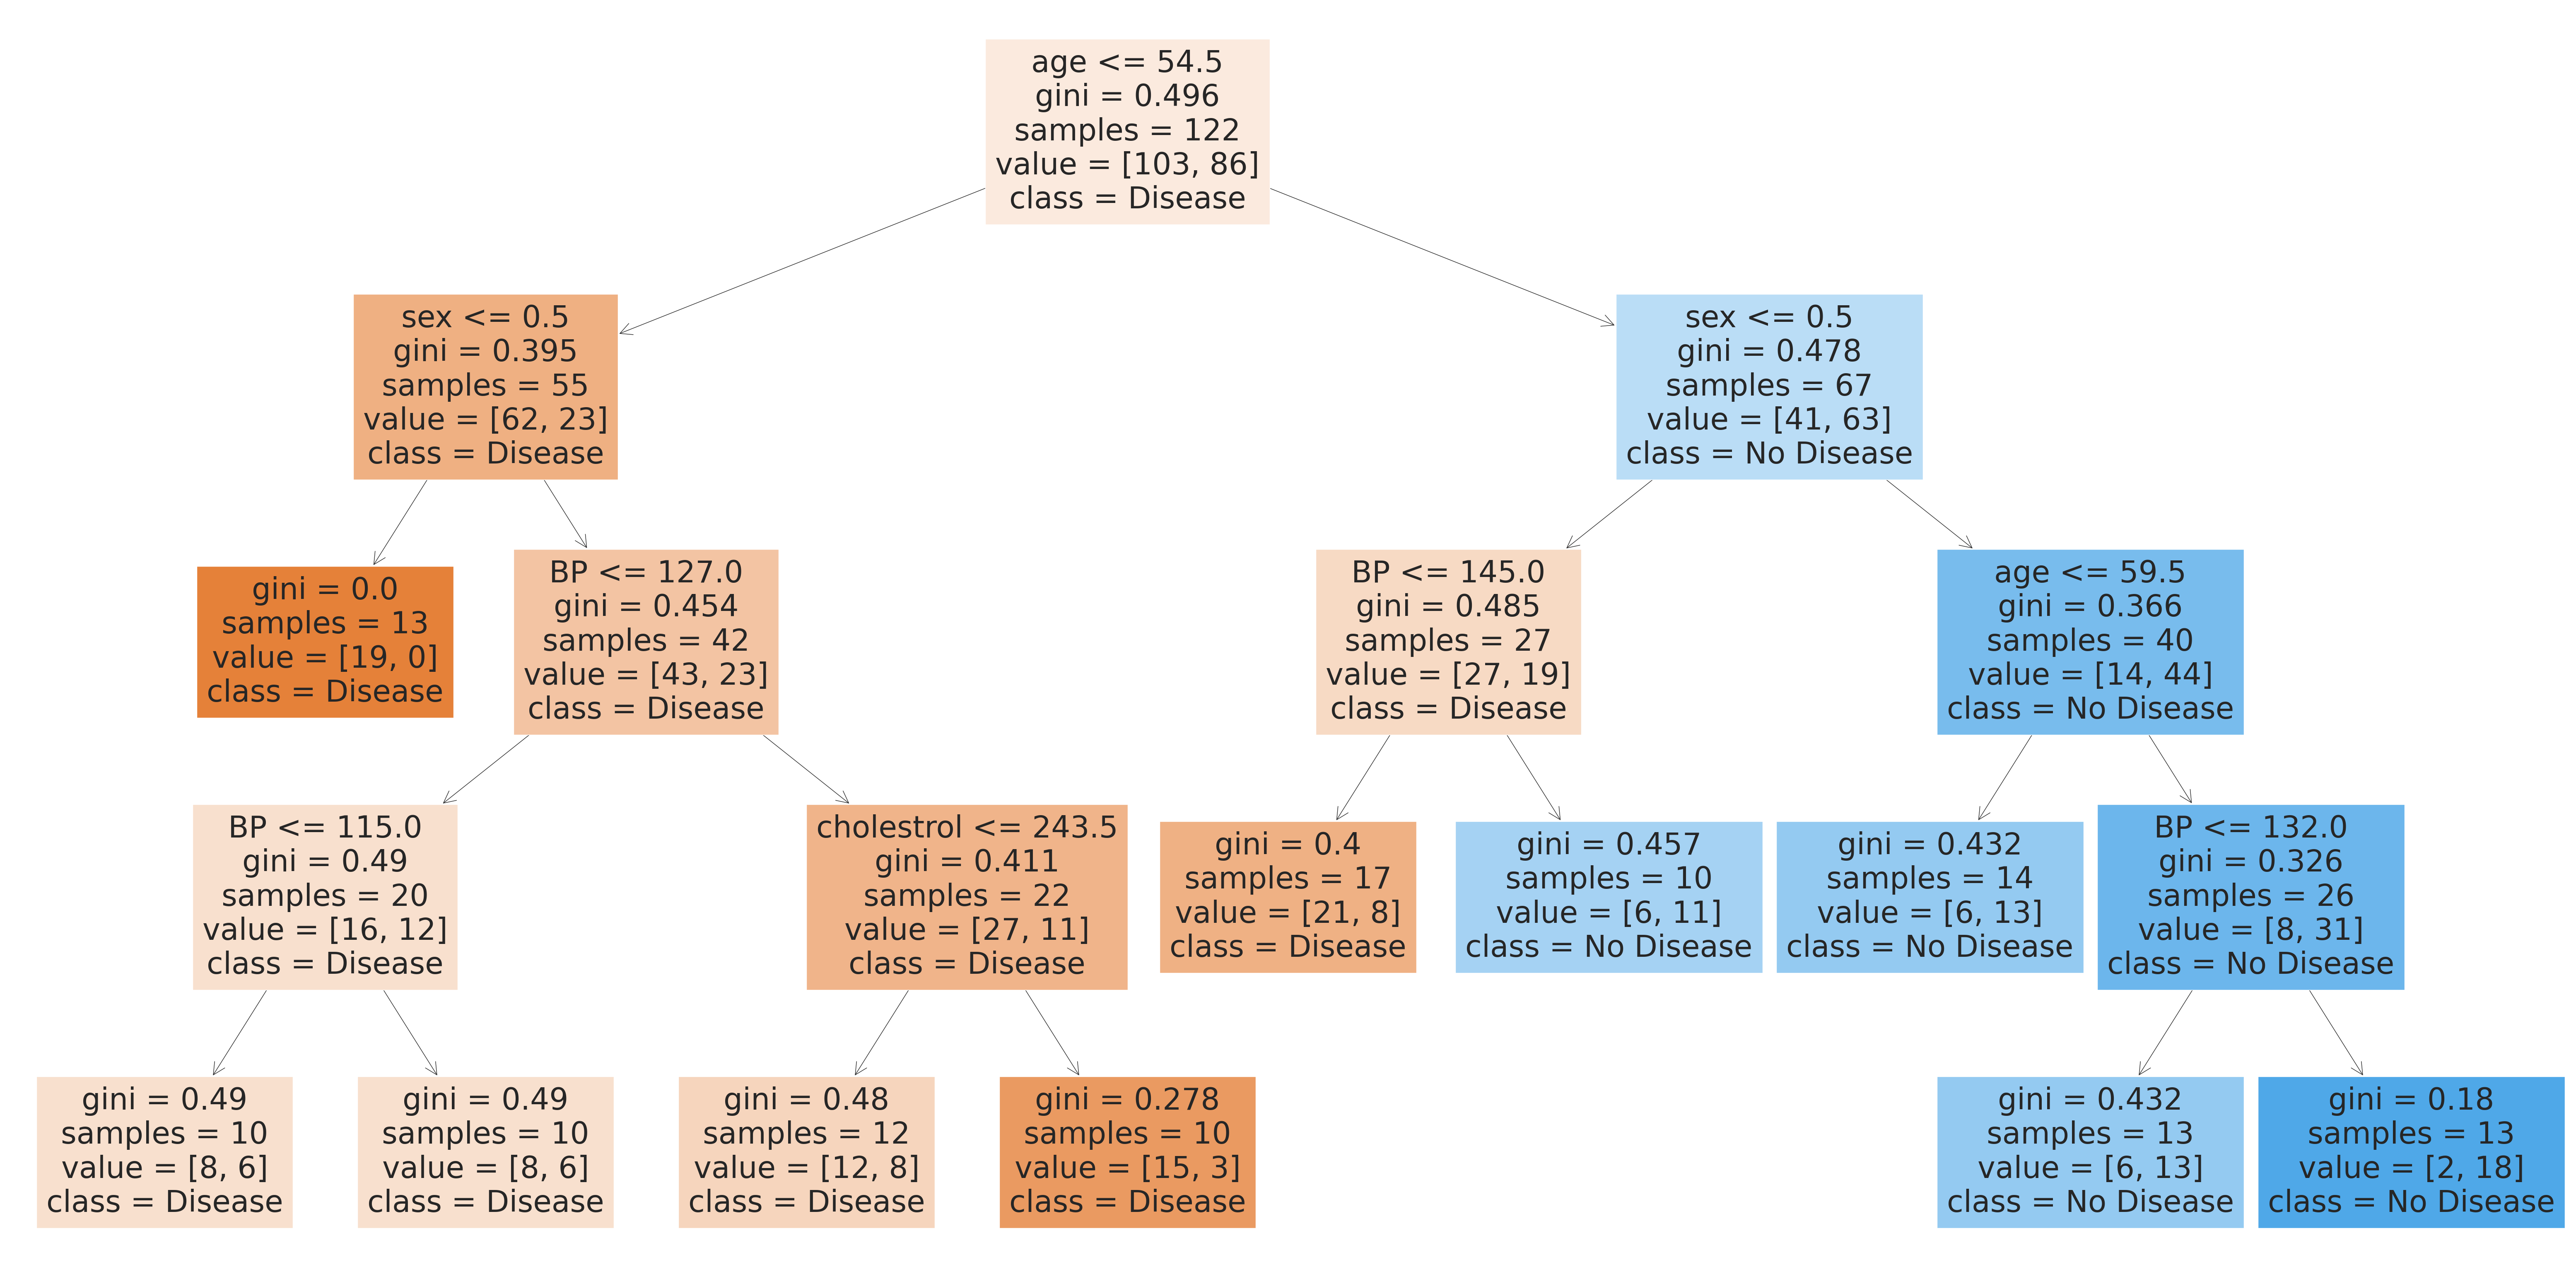

In [37]:
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7],feature_names=['age', 'sex', 'BP', 'cholestrol'],class_names=['Disease', "No Disease"],filled=True)
plt.show()

In [25]:
#The trees created by estimators_[5] and estimators_[7] are different. Thus we can say that each tree is independent of the other.

Sort data with feature importance

In [26]:
rf_best.feature_importances_


array([0.46128487, 0.2180848 , 0.13174619, 0.18888413])

In [27]:
imp_df = pd.DataFrame({
    'Varname': X_train.columns,
    'Imp': rf_best.feature_importances_
})
#imp_df.head()


In [28]:
imp_df.sort_values(by='Imp',ascending=False)

,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746


# Adaboosting classifier

In [29]:
from sklearn.ensemble import AdaBoostClassifier

In [30]:
adb = AdaBoostClassifier()
adb_model = adb.fit(X_train,y_train)

In [31]:
adb_model.score(X_test,y_test)

0.6419753086419753

In [32]:
adb_model.score(X_train,y_train)

0.8042328042328042